# Alumno: Gerardo de Miguel González

1.- Crea una función como la del ejercicio 2 en la que se pase como input: un vector x con la variable independiente, un parámetro “a”, un parámetro “b” y un valor “sigma”; y que devuelva un vector “y” que esté distribuido como una función normal con media = a*x + b y sigma = “sigma”. 

In [1]:
medida <- function(x, a = 1,b = 2, sigma = 0.2) {
    return (b + a*x + rnorm(length(x), 0, sigma))
}

2.- Construye una función que reciba dos vectores “x” e “y” supuestamente relacionados linealmente y calcule los valores de “a” y “b” que minimizan la función de coste. 

In [2]:
#::GMG::Programo la función que resuelve 'ordinary least squares' (OLS)
#       las betas de forma matricial en una regresión lineal múltiple
betas <- function(x,y) {
    i <- rep(1, length(y))
    X <- cbind(i,x)
    Y <- matrix(y, nrow = length(y))
    B_hat <- solve(t(X) %*% X) %*% t(X) %*% Y
    return (as.numeric(B_hat))
}

In [3]:
#::GMG::Defino la función de coste 
#::nota::betas es el vector de coeficientes de regresión, i.e 
#        beta_0, beta_1, ... beta_p
#        x son las 'features' de la matriz de diseño (1,x)
cost <- function(betas,x,y) {
    i <- rep(1, length(y))
    X <- cbind(i,x)
    B <- matrix(betas, nrow = length(betas))
    Y <- matrix(y, nrow = length(y))
    return (as.numeric(t(Y - X %*% B) %*% (Y - X %*% B)))
}

In [4]:
#::GMG::Me hago mi función de regresión lineal 
mi_lm <- function(x,y) {
    coef <- betas(x = x,y = y)
    coste <- cost(betas = coef,x = x,y = y)
    list(coeficientes = coef, coste = coste)
}

3.- Genera un vector x aleatorio con valores entre 0 y 8 y N = 100 puntos. Usa la función creada en 1 con valores a=1, b=2 y sigma=2, y la función creada en 2 para encontrar el mínimo de la función de coste. Pinta en un mismo plot “x” e “y” representados con puntos, y la recta “a*x + b”.

In [5]:
#::GMG::Hago el exprimento reproducible
set.seed(1)

In [6]:
#::GMG::Calculo el vector aleatorio de 100 elementos de 0 a 8
x <- sample(x = seq(from = 0, to = 8, length.out = 100), replace=FALSE)

In [7]:
str(x)

 num [1:100] 2.1 2.91 4.53 7.11 1.54 ...


In [8]:
#::GMG::Genero las muestras con ruido gausiano
muestras <- medida(x = x, a = 1, b = 2, sigma = 2)

In [9]:
str(muestras)

 num [1:100] 4.9 3.69 7.21 6.85 6.4 ...


In [10]:
#::GMG::Hago mi regresión
model <- mi_lm(x = x, y = muestras)

In [11]:
round(model$coeficientes,2)

[1] 2.33 0.91

In [12]:
round(model$coste,2)

[1] 345.45

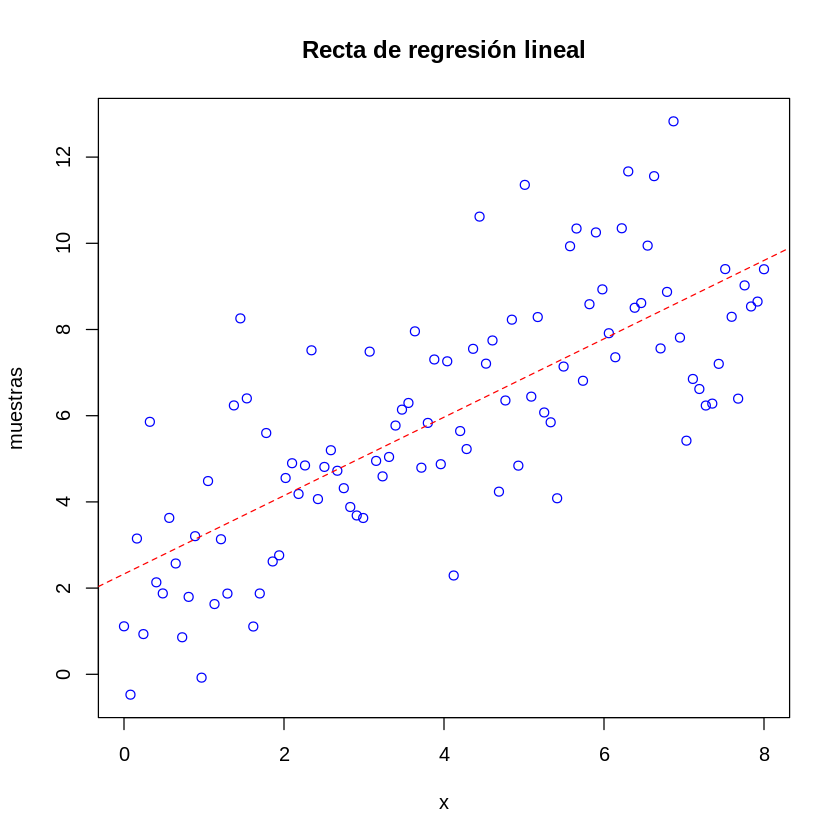

In [13]:
#::GMG::Dibujo el resultado
plot(x, muestras, col = 'blue')
abline(coef = model$coeficientes, col = 'red', lty = 2)
title('Recta de regresión lineal')

4.- Construye una función que calcule la matriz de covarianza asociada al ajuste lineal anterior. Utilízala con los vectores “x” e “y” anteriores y calcula dicha matriz para ese caso particular.

In [14]:
#::GMG::Calculo la matriz de varianza-covarianza de las betas del modelo
cov_betas <- function (model,x){
    X <- cbind(1,x)
    #::GMG::Estimo sigma^2 como MSE = SSE/n-p
    mse <- model$coste/(nrow(X)-ncol(X))
    #::GMG::La matriz es sigma_hat^2 (t(X)X)^-1
    R <- mse*solve(t(X)%*%X)
    return(R)
}

In [15]:
S_sq_betas_hat <- cov_betas(model = model, x = x)
print(S_sq_betas_hat)

                         x
   0.13890509 -0.025913826
x -0.02591383  0.006478457


5.- Crea una función como la del apartado 1 donde se añadan 3 parámetros más (c, d, e) y en dónde todo sea igual salvo que medida = a + b*x + *x^2 + d*x^3 + e*x^4

In [16]:
#::GMG::Algoritmo de Horner vectorizado para hallar el valor de un polinomio
# https://rosettacode.org/wiki/Horner%27s_rule_for_polynomial_evaluation
#       x: variable independiente
#       v: vector de coeficientes en x^0, x^1, ..., x^p
horner <- function(x, v) {
  Reduce(v, right=T, f=function(a, b) {
    b * x + a
  })
}

In [17]:
#::GMG::Función que genera el polinomio junto con un ruido distribuido
#       N(0,sigma)
pol <- function (x, coeficientes ,sigma) {
    return(horner(x, coeficientes) + rnorm(length(x),0,sigma))
}

6.- Repite 3 y 4 con la función generada en 5 y usando: a = 107, b=-176, c=86, d=-16, e=1

In [18]:
set.seed(1)

In [19]:
muestras_2 <- pol(x = x, coeficientes = c(107, 176, 86, 16, 1), sigma = 2)

In [20]:
str(muestras_2)

 num [1:100] 1023 1813 4565 14021 644 ...


In [21]:
model_2 <- mi_lm(x = x, y = muestras_2)

In [22]:
model_2$coeficientes

[1] -3250.235  2201.425

In [23]:
model_2$coste

[1] 366771399

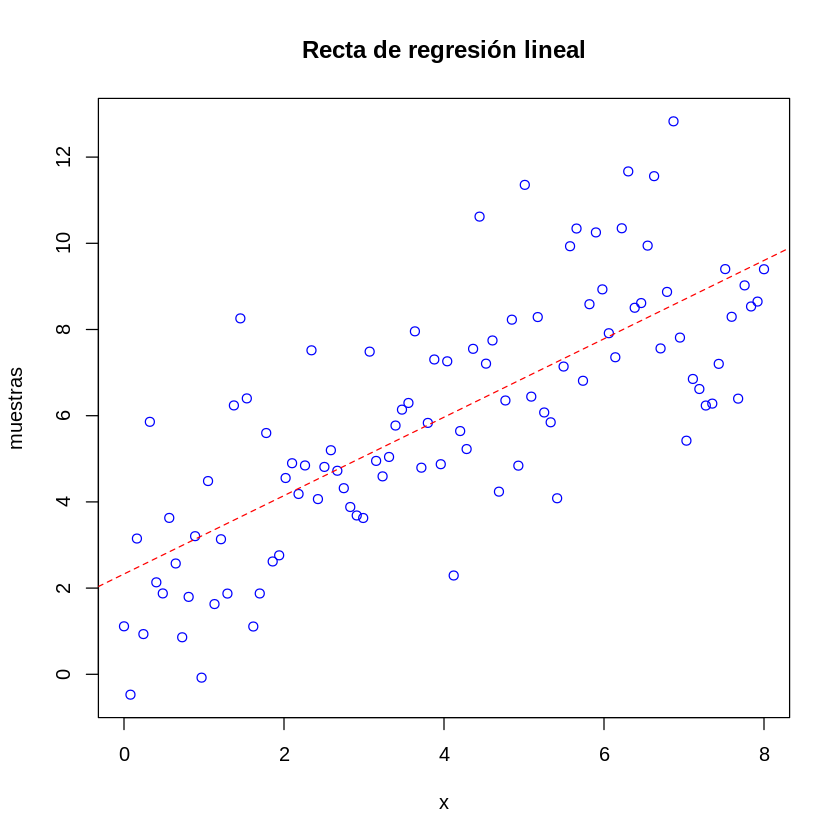

In [24]:
#::GMG::Dibujo el resultado
plot(x, muestras, col = 'blue')
abline(coef = model$coeficientes, col = 'red', lty = 2)
title('Recta de regresión lineal')